<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/1_3_Supervised_Learning_with_scikit_learn_Fine_Tuning_Your_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-3 Supervised Learning with scikit-learn - Fine-Tuning Your Model

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
plt.style.use('ggplot')

## Data

### Diabetes

In [3]:
data_url = 'https://drive.google.com/uc?id=147311XR5gBBU7zRpI4qEvAOO4jr54pG-'

diabetes = pd.read_csv(data_url)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## How good is your model?

### Classification metrics

- Measuring model peformance with **accuracy**:
    - Proportion of correctly classified samples
    - Not always a useful metric

### Class imbalance

- Classification for predicting fraudulent bank transactions
    - 99% of transactions are legitimate
    - 1% are fraudulent
- A model that precicts NONE as fraudulent
    - 99% accurate
    - But terrible at predicting fraudulent transactions
    - Fails at its original purpose
- **Class imbalance**: uneven frequency of classes
    - Need a different way to assess performance

### Confusion Matrix

- Fraudulent is the postive class
- Usually, the class of interest is called the positive class

|                 | **Predicted: Legitimate** | **Predicted: Fraudulent** |
|---------------|---------------------|---------------------|
| **Actual: Legitimate** | **True Negative (TN)**  | **False Positive (FP)**  |
| **Actual: Fraudulent** | **False Negative (FN)** | **True Positive (TP)**  |

### Accuracy

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

### Precision

- aka the **postivive predictive value**
- High precision means having a lower false positive rate
- In our example, high precision means not having many legitimate transactions that are predicted to be fraudulent

$$
Precision = \frac{TP}{TP + FP}
$$

### Recall

- aka **sensitivity**
- High recall means having a lower false negative rate
- In our example, high recall means not having many fraudulent transactions that are predicted to be legitimate

$$
Recall = \frac{TP}{TP + FN}
$$

### F1 score

- The harmonic mean of precision and recall
- This metric gives equal weight to precision and recall
- Favours models with similar precision and recall

$$
F1 = 2 \times \frac{precision \times recall}{precision + recall}
$$

```python
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.precicti(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

### Assessing a diabetes prediction classifier

In [4]:
X = diabetes[['bmi', 'age']]
y = diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 2), (231, 2), (537,), (231,))

In [5]:
knn = KNeighborsClassifier(n_neighbors=6)

In [6]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [7]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [8]:
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[116  35]
 [ 46  34]]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       151
           1       0.49      0.42      0.46        80

    accuracy                           0.65       231
   macro avg       0.60      0.60      0.60       231
weighted avg       0.64      0.65      0.64       231



In [10]:
# precision
prec = 34 / (34 + 35)
prec

0.4927536231884058

In [11]:
# recall
recall = 34 / (34 + 46)
recall

0.425

In [12]:
# f1-score
f1 = 2 * (prec * recall) / (prec + recall)
f1

0.4563758389261745

In [13]:
# accuracy
acc = (34 + 116) / (34 + 116 + 35 + 46)
acc

0.6493506493506493

## Logistic regression and the ROC curve

### Logistic regression for binary classification

- Logistic regression outputs probabilities
- The classifiction depends on the **probability threshold**
    - if $p \gt 0.5$ then 1 else 0
    - 0.5 is the default probability threshold
- Logistic regression produces a **linear decision boundary**

```python
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
```

### Predicting probabilities

```python
# we slice the second column which represents
#. the probability of the positive class
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
```

### Probility thresholds

- By default, the logistic regression threshold is 0.5
- Not specific to logistic regression
    - KNN classifiers also have thresholds
- What happens if we vary the threshold?
    - We can use the ROC Curve to visualize the impact of threshold values

### Plotting the ROC curve

```python
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Postivie Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
```

### ROC AUC

- The area under the ROC curve
    - scores range from 0 to 1, with 1 being ideal

```python
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_probs))
```

### Building a logistic regressionm model

In [14]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred_probs = logreg.predict_proba(X_test)
y_pred_probs

array([[0.73448976, 0.26551024],
       [0.81663397, 0.18336603],
       [0.87880364, 0.12119636],
       [0.84386463, 0.15613537],
       [0.50388782, 0.49611218],
       [0.55417793, 0.44582207],
       [0.98640756, 0.01359244],
       [0.38353896, 0.61646104],
       [0.44359464, 0.55640536],
       [0.20688189, 0.79311811],
       [0.77188715, 0.22811285],
       [0.09960942, 0.90039058],
       [0.61558409, 0.38441591],
       [0.71437854, 0.28562146],
       [0.93046406, 0.06953594],
       [0.64019253, 0.35980747],
       [0.872845  , 0.127155  ],
       [0.93133654, 0.06866346],
       [0.14132066, 0.85867934],
       [0.40641788, 0.59358212],
       [0.78804596, 0.21195404],
       [0.92446153, 0.07553847],
       [0.52986699, 0.47013301],
       [0.90654767, 0.09345233],
       [0.4564243 , 0.5435757 ],
       [0.11356321, 0.88643679],
       [0.89170429, 0.10829571],
       [0.96976566, 0.03023434],
       [0.72707024, 0.27292976],
       [0.88597861, 0.11402139],
       [0.

In [18]:
y_pred_probs.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [19]:
y_pred_probs = y_pred_probs[:, 1]
y_pred_probs

array([0.26551024, 0.18336603, 0.12119636, 0.15613537, 0.49611218,
       0.44582207, 0.01359244, 0.61646104, 0.55640536, 0.79311811,
       0.22811285, 0.90039058, 0.38441591, 0.28562146, 0.06953594,
       0.35980747, 0.127155  , 0.06866346, 0.85867934, 0.59358212,
       0.21195404, 0.07553847, 0.47013301, 0.09345233, 0.5435757 ,
       0.88643679, 0.10829571, 0.03023434, 0.27292976, 0.11402139,
       0.91422209, 0.88059872, 0.80553743, 0.82376661, 0.63936856,
       0.68545728, 0.95479802, 0.22859241, 0.48080774, 0.72959715,
       0.06276091, 0.58338165, 0.55426593, 0.31526846, 0.02832228,
       0.52928545, 0.60828943, 0.205596  , 0.3365952 , 0.963966  ,
       0.0440161 , 0.65924617, 0.82521821, 0.25868054, 0.10735565,
       0.03737646, 0.79004161, 0.00409036, 0.40400218, 0.77799116,
       0.72446689, 0.34511148, 0.22945732, 0.20603482, 0.0819663 ,
       0.61797165, 0.04483281, 0.78383896, 0.03681324, 0.78916948,
       0.69558161, 0.06639784, 0.16847453, 0.11906724, 0.08949

### The ROC Curve

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

In [21]:
fpr

array([0.        , 0.        , 0.00662252, 0.00662252, 0.01324503,
       0.01324503, 0.01986755, 0.01986755, 0.02649007, 0.02649007,
       0.0397351 , 0.0397351 , 0.04635762, 0.04635762, 0.05298013,
       0.05298013, 0.06622517, 0.06622517, 0.07284768, 0.07284768,
       0.08609272, 0.08609272, 0.09271523, 0.09271523, 0.09933775,
       0.09933775, 0.1192053 , 0.1192053 , 0.13245033, 0.13245033,
       0.1589404 , 0.1589404 , 0.17880795, 0.17880795, 0.18543046,
       0.18543046, 0.1986755 , 0.1986755 , 0.20529801, 0.20529801,
       0.2384106 , 0.2384106 , 0.27152318, 0.27152318, 0.2781457 ,
       0.2781457 , 0.29801325, 0.29801325, 0.30463576, 0.30463576,
       0.31125828, 0.31125828, 0.31788079, 0.31788079, 0.34437086,
       0.34437086, 0.36423841, 0.36423841, 0.37086093, 0.37086093,
       0.39735099, 0.39735099, 0.40397351, 0.40397351, 0.43708609,
       0.43708609, 0.45033113, 0.45033113, 0.46357616, 0.46357616,
       0.47682119, 0.47682119, 0.50993377, 0.50993377, 0.52317

In [22]:
tpr

array([0.    , 0.0125, 0.0125, 0.0625, 0.0625, 0.1125, 0.1125, 0.225 ,
       0.225 , 0.25  , 0.25  , 0.2625, 0.2625, 0.3375, 0.3375, 0.375 ,
       0.375 , 0.4125, 0.4125, 0.425 , 0.425 , 0.5   , 0.5   , 0.5125,
       0.5125, 0.525 , 0.525 , 0.5375, 0.5375, 0.575 , 0.575 , 0.5875,
       0.5875, 0.6   , 0.6   , 0.6125, 0.6125, 0.625 , 0.625 , 0.6375,
       0.6375, 0.6625, 0.6625, 0.675 , 0.675 , 0.6875, 0.6875, 0.7   ,
       0.7   , 0.7125, 0.7125, 0.7375, 0.7375, 0.7625, 0.7625, 0.775 ,
       0.775 , 0.7875, 0.7875, 0.8   , 0.8   , 0.8125, 0.8125, 0.825 ,
       0.825 , 0.8375, 0.8375, 0.8625, 0.8625, 0.8875, 0.8875, 0.9   ,
       0.9   , 0.9125, 0.9125, 0.925 , 0.925 , 0.9375, 0.9375, 0.95  ,
       0.95  , 0.9625, 0.9625, 0.975 , 0.975 , 0.9875, 0.9875, 1.    ,
       1.    ])

In [23]:
thresholds

array([       inf, 0.9676762 , 0.963966  , 0.90097217, 0.90039058,
       0.88059872, 0.87978312, 0.82376661, 0.80936398, 0.80262877,
       0.79311811, 0.79074895, 0.79004161, 0.77091661, 0.76554895,
       0.74834938, 0.74223091, 0.72446689, 0.72432719, 0.70749498,
       0.69558161, 0.65924617, 0.64860482, 0.64426411, 0.6437957 ,
       0.64361299, 0.62303277, 0.62102218, 0.61646104, 0.59358212,
       0.55426593, 0.54975512, 0.53954613, 0.52928545, 0.52273023,
       0.51380343, 0.50574176, 0.5043372 , 0.49611218, 0.488072  ,
       0.44582207, 0.41388268, 0.39225042, 0.38441591, 0.36633605,
       0.35980747, 0.3454857 , 0.3453751 , 0.34511148, 0.34384207,
       0.3365952 , 0.32078084, 0.31917911, 0.31343408, 0.29633816,
       0.2907069 , 0.2761742 , 0.27292976, 0.27100999, 0.26732873,
       0.26308562, 0.26130196, 0.25891874, 0.25868054, 0.246152  ,
       0.23981751, 0.22945732, 0.22811285, 0.21995209, 0.21708907,
       0.211012  , 0.20603482, 0.18172745, 0.17304938, 0.16501

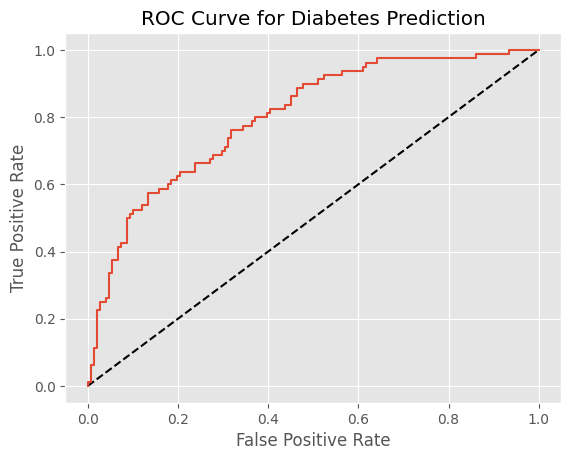

In [24]:
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

### ROC AUC

In [25]:
roc_auc_score(y_test, y_pred_probs)

0.8002483443708608

In [26]:
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[121  30]
 [ 30  50]]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [28]:
(y_pred_probs > 0.5) == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## Hyperparameter tuning

- Ridge/lass regression: choosing `alpha`
- KNN: chosing `n_neighbors`

A **hyperparameter** is a parameter we specify ***BEFORE*** fitting the model.

### Choosing the correct hyperparameters